In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv(r'C:/Users/60547/Documents/py/python_lianxi/datasets/custom_loss/churn.csv')
df.head()

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
#数据处理
churn_mapping={'False.':0,'True.':1}
intplan_mapping={'yes':1,'no':0}
vmailpan_mapping={'yes':1,'no':0}
df['Intl Plan']=df['Intl Plan'].map(intplan_mapping)
df['VMail Plan']=df['VMail Plan'].map(vmailpan_mapping)
df['Churn']=df['Churn'].map(churn_mapping)

#丢掉不用的数据
df.drop(['Phone','Area Code','Account Length','State'],inplace=True,axis=1)
df.sample(5)

,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
718,0,0,0,182.3,124,30.99,169.9,110,14.44,184.0,116,8.28,9.3,3,2.51,1,0
1672,0,0,0,203.4,96,34.58,168.6,61,14.33,173.0,105,7.79,13.7,3,3.70,2,0
2308,0,0,0,207.0,112,35.19,173.8,96,14.77,178.4,61,8.03,12.1,3,3.27,1,0
2358,0,0,0,104.0,92,17.68,197.0,125,16.75,110.1,123,4.95,14.6,8,3.94,0,0
3142,0,0,0,184.2,95,31.31,181.6,101,15.44,143.4,113,6.45,12.8,4,3.46,2,0


In [4]:
#有的列的数据很大,有的很小,将其进行归一化/标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=df.drop('Churn',axis=1)
y_train=df['Churn']
x_train=scaler.fit_transform(x_train)
print(x_train,x_train.shape)
#查看标签值分布
len(y_train[y_train==1])

[[-0.32758048  1.6170861   1.23488274 ... -0.60119509 -0.0856905
  -0.42793202]
 [-0.32758048  1.6170861   1.30794844 ... -0.60119509  1.2411686
  -0.42793202]
 [-0.32758048 -0.61839626 -0.59175986 ...  0.21153386  0.69715637
  -1.1882185 ]
 ...
 [-0.32758048 -0.61839626 -0.59175986 ...  0.61789834  1.3871231
   0.33235445]
 [ 3.05268496 -0.61839626 -0.59175986 ...  2.24335625 -1.87695028
   0.33235445]
 [-0.32758048  1.6170861   1.23488274 ... -0.19483061  1.2411686
  -1.1882185 ]] (3333, 16)


483

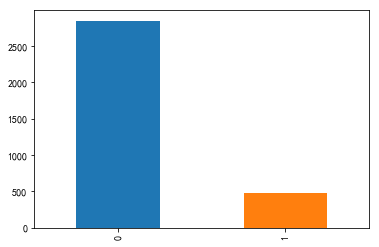

In [5]:
y_train.value_counts().plot(kind='bar')
#样本有些不均衡

In [6]:
#选用何种算法未知,定义一个通用的返回predict值的算法
from sklearn.cross_validation import KFold
def get_predict(X,y,clf_class,**kwargs):
    y_pred=y.copy()
    kf=KFold(len(y),n_folds=10,shuffle=True)
    for train_index,test_index in kf:
        x_train=X[train_index]
        y_train=y[train_index]
        x_test=X[test_index]
        clf=clf_class(**kwargs)
        clf.fit(x_train,y_train)
        y_pred[test_index]=clf.predict(x_test)
    return y_pred    

C:\Users\60547\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.linear_model import LogisticRegression as lr
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

C:\Users\60547\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
print('accuracy score of randomforest is:%.3f'%accuracy_score(y_train,get_predict(x_train,y_train,rfc)))
print('accuracy score of logisticRegression is:%.3f'%accuracy_score(y_train,get_predict(x_train,y_train,lr)))  
print('accuracy score of knn is:%.3f'%accuracy_score(y_train,get_predict(x_train,y_train,knn)))   
# print(help(KFold))

accuracy score of randomforest is:0.948
accuracy score of logisticRegression is:0.862
accuracy score of knn is:0.896


In [9]:
#总的分类准确率并不能完全反应我们关注的指标,更关心真正流失的客户有没有被找出来即查全率
from sklearn.metrics import recall_score
print('recall score of randomforest is:%.3f'%recall_score(y_train,get_predict(x_train,y_train,rfc),average='binary'))
print('recall score of logisticRegression is:%.3f'%recall_score(y_train,get_predict(x_train,y_train,lr),average='binary'))  
print('recall score of knn is:%.3f'%recall_score(y_train,get_predict(x_train,y_train,knn),average='binary'))  

recall score of randomforest is:0.710
recall score of logisticRegression is:0.211
recall score of knn is:0.383


In [10]:
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
def get_predict_proba(X,y,clf_class,**kwargs):
    p=np.zeros((len(y),2))
    
    kf=KFold(len(y),n_folds=10,shuffle=True)
    for train_index,test_index in kf:
        x_train=X[train_index]
        y_train=y[train_index]
        x_test=X[test_index]
        clf=clf_class(**kwargs)
        clf.fit(x_train,y_train)
        p[test_index]=clf.predict_proba(x_test)
      
    return p

In [12]:
cnf_with_rfc=confusion_matrix(y_train,get_predict(x_train,y_train,rfc))
cnf_with_lr=confusion_matrix(y_train,get_predict(x_train,y_train,lr))
cnf_with_knn=confusion_matrix(y_train,get_predict(x_train,y_train,knn))
np.set_printoptions(precision=2)
classes_names=[0,1]

Text(0.5, 1.0, 'knn')

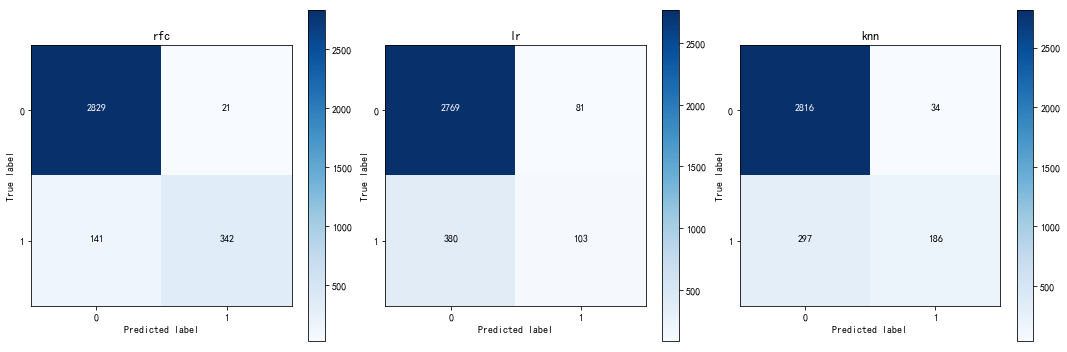

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plot_confusion_matrix(cnf_with_rfc,classes_names)
plt.title('rfc')

plt.subplot(132)
plot_confusion_matrix(cnf_with_lr,classes_names)
plt.title('lr')

plt.subplot(133)
plot_confusion_matrix(cnf_with_knn,classes_names)
plt.title('knn')

In [14]:
def get_predict_proba(X,y,clf_class,**kwargs):
    p=np.zeros((len(y),2))
    
    kf=KFold(len(y),n_folds=10,shuffle=True)
    for train_index,test_index in kf:
        x_train=X[train_index]
        y_train=y[train_index]
        x_test=X[test_index]
        clf=clf_class(**kwargs)
        clf.fit(x_train,y_train)
        p[test_index]=clf.predict_proba(x_test)
      
    return p

In [15]:
pred_prob=get_predict_proba(x_train,y_train,rfc,n_estimators=10)
pred_prob_sel=pd.Series(pred_prob[:,1])
# pred_prob_sel[pred_prob_sel>0.5].value_counts()
counts=pd.value_counts(pred_prob_sel)
pred_prob_sel[pred_prob_sel>0.5]

is_churn=y_train==1
true_pred={}
for ind in counts.index:
    true_pred[ind]=np.mean(is_churn[pred_prob_sel==ind])
    true_pred=pd.Series(true_pred)

data=pd.concat([counts,true_pred],axis=1).reset_index()
data.columns=['thershholds','counts','proba']
data

# print(is_churn[pred_prob_sel==ind],len(is_churn[pred_prob_sel==ind]))

,thershholds,counts,proba
0,0.0,1828,0.028446
1,0.1,675,0.025185
2,0.2,246,0.052846
3,0.3,102,0.107843
4,1.0,82,1.000000
5,0.9,77,0.974026
6,0.7,74,0.864865
7,0.8,70,0.985714
8,0.4,66,0.348485
9,0.6,64,0.781250


In [16]:
from imblearn.over_sampling import SMOTE
over_sampler=SMOTE()
os_features,os_lables=over_sampler.fit_sample(x_train,y_train)
print(len(os_features))
print(len(os_lables))

5700
5700
